In [1]:
from keras.models import Sequential     # used to initialize the NN as a sequence of layers
from keras.layers import Convolution2D       # used to build the convolution layer for 2D images
from keras.layers import MaxPooling2D        # used to do the do max pooling on 2D images
from keras.layers import Flatten             # flattening the pooled feature maps into the feature vector
from keras.layers import Dense               # package to add the fully-connected layers in the NN

Using TensorFlow backend.


In [2]:
# Initializing the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
# common practice to start with 32 feature detectors in the first convolutional layer and then add more C layers later
# All our images will be converted to a fixed, same, size
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))   # colored images (3) with 64 * 64 pixels
# if working on a GPU we can try 128 * 128 px or even 256 * 256 px

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.


In [4]:
# Step 2 - Pooling
# Common to take a 2x2 pooling box
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
# Lets add another convolution layer to try and improve our results
# Don't need the input_shape anymore since keras knows the shape of the input pooled feature maps
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

In [7]:
# Step 4 - Full Connection
# The parameters below can be determined exerimentally or from experience (common practice for output_dim is to use a
# power of 2
classifier.add(Dense(output_dim = 128, activation = 'relu'))     # adding a fully-connected layer
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))    # adding the output layer (use 'softmax' if more than 2 outcomes)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """


In [8]:
# Compiling the CNN
# for loss function , if we had more than 2 outcomes, we need to choose 'categorical_crossentropy'
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),        # our image pixel size
        batch_size=32,
        class_mode='binary')         # type of outcome

Found 8000 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


# CNN already trained, skip the following cell

In [ ]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000,     # Number of images in the training set
        epochs=1,                 # can increase if using GPU
        validation_data=test_set,
        validation_steps=2000)       # Number of images in the test set

# Loading model in the following cell

In [14]:
from keras.models import load_model
c = load_model('Cat-Dog-Classifier.h5')

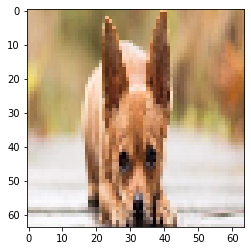

This is a picture of a dog 




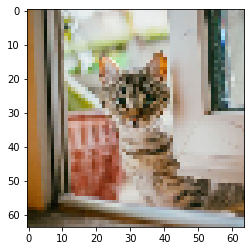

This is a picture of a cat 




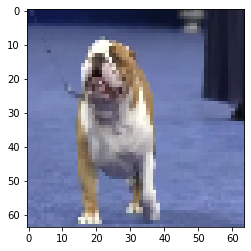

This is a picture of a dog 




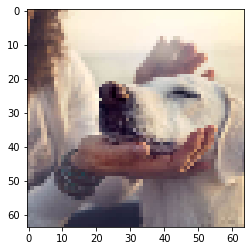

This is a picture of a dog 




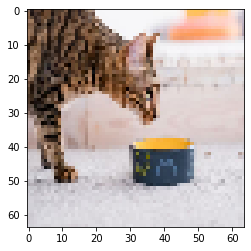

This is a picture of a cat 




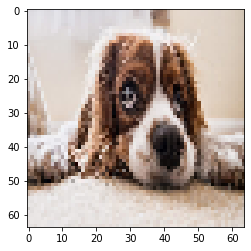

This is a picture of a dog 




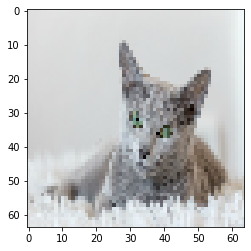

This is a picture of a cat 




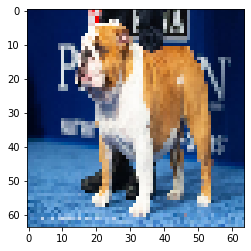

This is a picture of a dog 




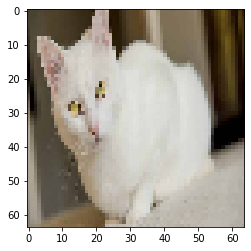

This is a picture of a cat 




In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import time

list_of_images = ['dog1.jpg', 'cat1.jpg', 'dog2.png','dog3.jpg', 'cat3.jpg', 'dog4.jpg', 'cat4.jpg', 'dog5.jpg', 'cat5.jpg']

for i in list_of_images:
    test_image = image.load_img('dataset/test/' + i, target_size = (64, 64))
    plt.imshow(test_image)
    plt.show()
    time.sleep(1.5)
    test_image_arr = image.img_to_array(test_image)

    test_image_arr = np.expand_dims(test_image, axis = 0)

    result = c.predict(test_image_arr)

    training_set.class_indices

    if result[0][0] == 1:

        prediction = 'dog'

    else:

        prediction = 'cat'
    print("This is a picture of a" + '\033[1m', prediction, '\n\n')
    time.sleep(2)